### Time Series for Athens, GA and Seattle, WA

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd
from datetime import datetime

In [27]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [28]:
#esm_hr
#esm_mmf

In [6]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [29]:
#Pick out two locations: Athens, GA & Seattle, WA
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24

In [39]:
#Calculate Percentiles
#99th
hr_athens_99 = np.percentile(hr_athens, 99)
hr_seattle_99 = np.percentile(hr_seattle, 99)
mmf_athens_99 = np.percentile(mmf_athens, 99)
mmf_seattle_99 = np.percentile(mmf_seattle, 99)
#75th
hr_athens_75 = np.percentile(hr_athens, 75)
hr_seattle_75 = np.percentile(hr_seattle, 75)
mmf_athens_75 = np.percentile(mmf_athens, 75)
mmf_seattle_75 = np.percentile(mmf_seattle, 75)
#50 
hr_athens_50 = np.percentile(hr_athens, 50)
hr_seattle_50 = np.percentile(hr_seattle, 50)
mmf_athens_50 = np.percentile(mmf_athens, 50)
mmf_seattle_50 = np.percentile(mmf_seattle, 50)
#25
hr_athens_25 = np.percentile(hr_athens, 25)
hr_seattle_25 = np.percentile(hr_seattle, 25)
mmf_athens_25 = np.percentile(mmf_athens, 25)
mmf_seattle_25 = np.percentile(mmf_seattle, 25)

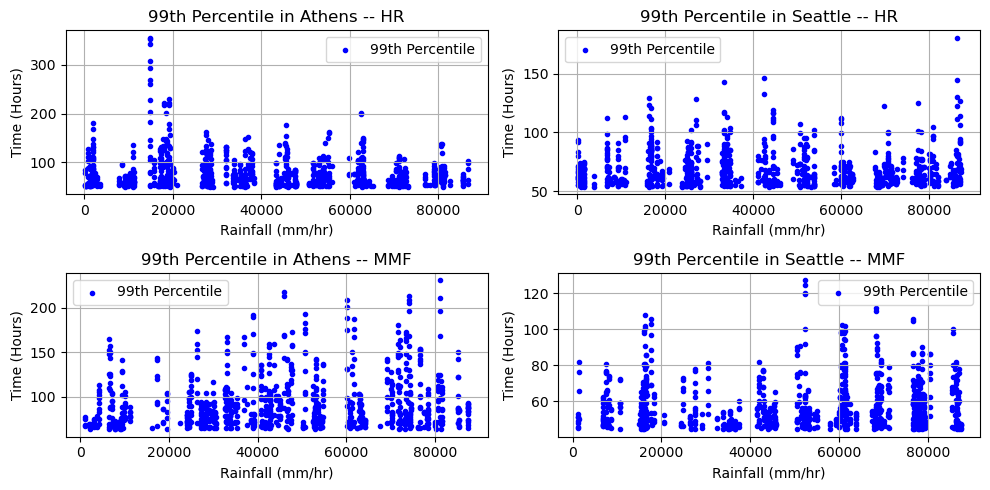

In [34]:
# Create a mask for values above the threshold
mask_hr_athens_99 = hr_athens > hr_athens_99
mask_hr_seattle_99 = hr_seattle > hr_seattle_99
mask_mmf_athens_99 = mmf_athens > mmf_athens_99
mask_mmf_seattle_99 = mmf_seattle > mmf_seattle_99

# Prepare x values (for example, indices)
x1 = np.arange(len(hr_athens))
x2 = np.arange(len(hr_seattle))
x3 = np.arange(len(mmf_athens))
x4 = np.arange(len(mmf_seattle))

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.scatter(x1[mask_hr_athens_99], hr_athens[mask_hr_athens_99], marker='.', linestyle='-', color='blue', label='99th Percentile')
#plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.title('99th Percentile in Athens -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(x2[mask_hr_seattle_99], hr_seattle[mask_hr_seattle_99], marker='.', linestyle='-', color='blue', label='99th Percentile')
#plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.title('99th Percentile in Seattle -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x3[mask_mmf_athens_99], mmf_athens[mask_mmf_athens_99], marker='.', linestyle='-', color='blue', label='99th Percentile')
#plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.title('99th Percentile in Athens -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x4[mask_mmf_seattle_99], mmf_seattle[mask_mmf_seattle_99], marker='.', linestyle='-', color='blue', label='99th Percentile')
#plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.title('99th Percentile in Seattle -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.tight_layout()

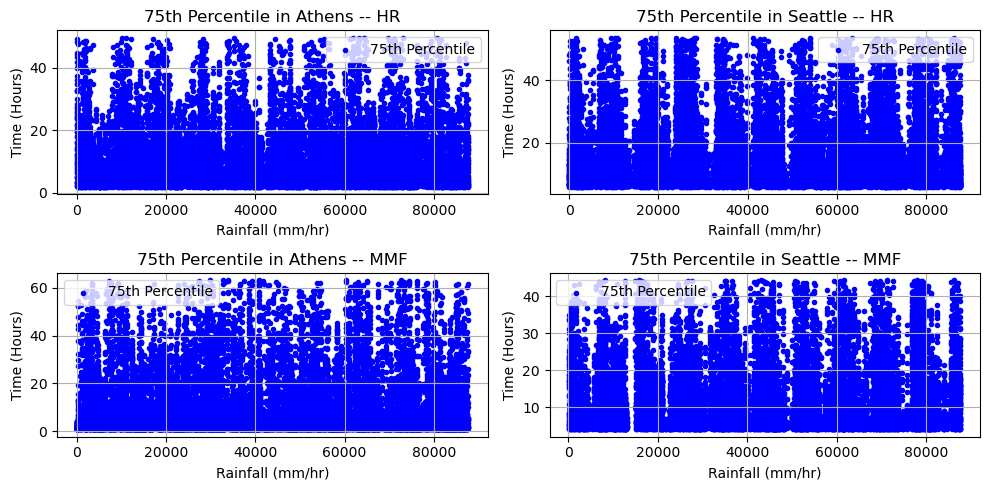

In [38]:
# Create a mask for values above the threshold
mask_hr_athens_75 = (hr_athens >= hr_athens_75)&(hr_athens <= hr_athens_99)
mask_hr_seattle_75 = (hr_seattle >= hr_seattle_75)&(hr_seattle <= hr_seattle_99)
mask_mmf_athens_75 = (mmf_athens >= mmf_athens_75)&(mmf_athens <= mmf_athens_99)
mask_mmf_seattle_75 = (mmf_seattle >= mmf_seattle_75)&(mmf_seattle <= mmf_seattle_99)

# Prepare x values (for example, indices)
x1_75 = np.arange(len(hr_athens))
x2_75 = np.arange(len(hr_seattle))
x3_75 = np.arange(len(mmf_athens))
x4_75 = np.arange(len(mmf_seattle))

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.scatter(x1_75[mask_hr_athens_75], hr_athens[mask_hr_athens_75], marker='.', linestyle='-', color='blue', label='75th Percentile')
#plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('75th Percentile in Athens -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(x2_75[mask_hr_seattle_75], hr_seattle[mask_hr_seattle_75], marker='.', linestyle='-', color='blue', label='75th Percentile')
#plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('75th Percentile in Seattle -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x3_75[mask_mmf_athens_75], mmf_athens[mask_mmf_athens_75], marker='.', linestyle='-', color='blue', label='75th Percentile')
#plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('75th Percentile in Athens -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x4_75[mask_mmf_seattle_75], mmf_seattle[mask_mmf_seattle_75], marker='.', linestyle='-', color='blue', label='75th Percentile')
#plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('75th Percentile in Seattle -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.tight_layout()

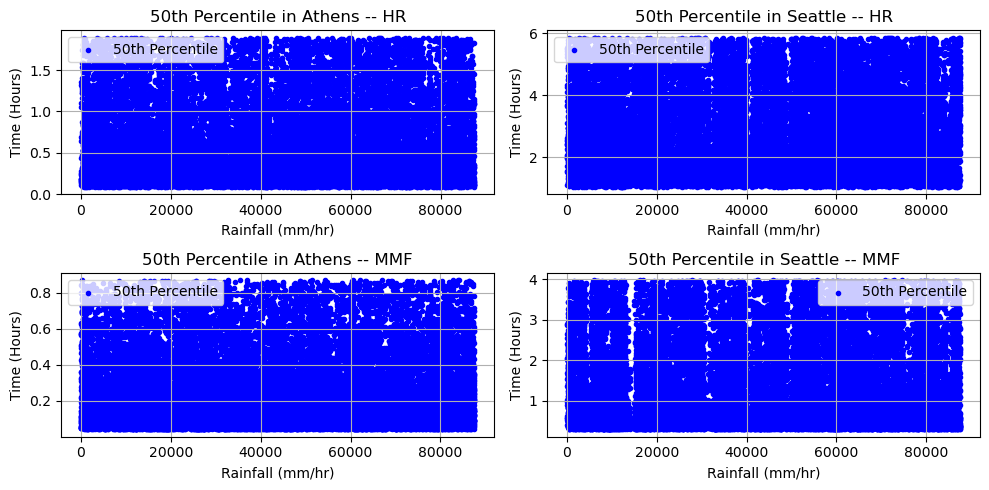

In [40]:
# Create a mask for values above the threshold
mask_hr_athens_50 = (hr_athens >= hr_athens_50)&(hr_athens <= hr_athens_75)
mask_hr_seattle_50 = (hr_seattle >= hr_seattle_50)&(hr_seattle <= hr_seattle_75)
mask_mmf_athens_50 = (mmf_athens >= mmf_athens_50)&(mmf_athens <= mmf_athens_75)
mask_mmf_seattle_50 = (mmf_seattle >= mmf_seattle_50)&(mmf_seattle <= mmf_seattle_75)

# Prepare x values (for example, indices)
x1_50 = np.arange(len(hr_athens))
x2_50 = np.arange(len(hr_seattle))
x3_50 = np.arange(len(mmf_athens))
x4_50 = np.arange(len(mmf_seattle))

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.scatter(x1_50[mask_hr_athens_50], hr_athens[mask_hr_athens_50], marker='.', linestyle='-', color='blue', label='50th Percentile')
#plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('50th Percentile in Athens -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(x2_50[mask_hr_seattle_50], hr_seattle[mask_hr_seattle_50], marker='.', linestyle='-', color='blue', label='50th Percentile')
#plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('50th Percentile in Seattle -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x3_50[mask_mmf_athens_50], mmf_athens[mask_mmf_athens_50], marker='.', linestyle='-', color='blue', label='50th Percentile')
#plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('50th Percentile in Athens -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x4_50[mask_mmf_seattle_50], mmf_seattle[mask_mmf_seattle_50], marker='.', linestyle='-', color='blue', label='50th Percentile')
#plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('50th Percentile in Seattle -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.tight_layout()

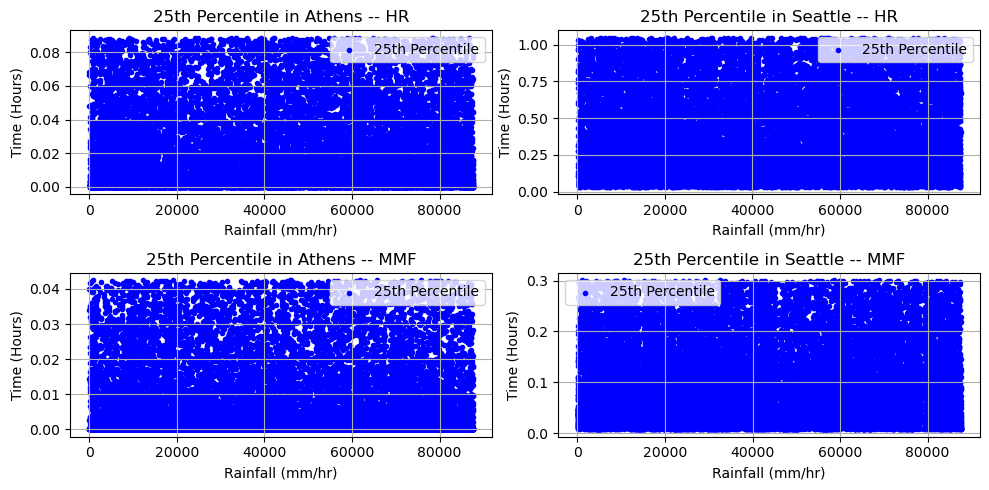

In [41]:
# Create a mask for values above the threshold
mask_hr_athens_25 = (hr_athens >= hr_athens_25)&(hr_athens <= hr_athens_50)
mask_hr_seattle_25 = (hr_seattle >= hr_seattle_25)&(hr_seattle <= hr_seattle_50)
mask_mmf_athens_25 = (mmf_athens >= mmf_athens_25)&(mmf_athens <= mmf_athens_50)
mask_mmf_seattle_25 = (mmf_seattle >= mmf_seattle_25)&(mmf_seattle <= mmf_seattle_50)

# Prepare x values (for example, indices)
x1_25 = np.arange(len(hr_athens))
x2_25 = np.arange(len(hr_seattle))
x3_25 = np.arange(len(mmf_athens))
x4_25 = np.arange(len(mmf_seattle))

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.scatter(x1_25[mask_hr_athens_25], hr_athens[mask_hr_athens_25], marker='.', linestyle='-', color='blue', label='25th Percentile')
#plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('25th Percentile in Athens -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(x2_25[mask_hr_seattle_25], hr_seattle[mask_hr_seattle_25], marker='.', linestyle='-', color='blue', label='25th Percentile')
#plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('25th Percentile in Seattle -- HR')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x3_25[mask_mmf_athens_25], mmf_athens[mask_mmf_athens_25], marker='.', linestyle='-', color='blue', label='25th Percentile')
#plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='75th Percentile')
plt.title('25th Percentile in Athens -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x4_25[mask_mmf_seattle_25], mmf_seattle[mask_mmf_seattle_25], marker='.', linestyle='-', color='blue', label='25th Percentile')
#plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='75th Percentile')
plt.title('25th Percentile in Seattle -- MMF')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Time (Hours)')
plt.legend()
plt.grid()

plt.tight_layout()